In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data.csv')

df.head()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto
0,BTC,1459382400,206476,1747,10.601309,417.16,411.45,412.44,415.66,17407273.19,0.0,2.188916e+06,NaN,NaN,NaN,NaN
1,BTC,1459468800,211922,1668,10.293830,416.86,412.79,415.66,415.64,15852511.01,0.0,2.181489e+06,NaN,NaN,NaN,NaN
2,BTC,1459555200,183503,1752,9.584394,420.09,415.09,415.64,418.51,13137339.89,0.0,1.758765e+06,NaN,NaN,NaN,NaN
3,BTC,1459641600,178429,1405,8.752097,420.18,416.95,418.51,419.06,9591214.82,0.0,1.561628e+06,NaN,NaN,NaN,NaN
4,BTC,1459728000,208929,1444,10.204954,420.39,416.21,419.06,419.33,14031939.65,0.0,2.132111e+06,NaN,NaN,NaN,NaN


In [3]:
list = []

for i in range(6, len(df)):
    open = df.iloc[i-6,7]
    list.append(open)

In [4]:
df = df.iloc[6:,]

In [5]:
df['pre_7_day_open'] = list

In [6]:
df = df.dropna()

In [7]:
df = df[df['7_day_reddit_comments_per_day'] > 0]

In [8]:
list = []

for i in range(0, len(df)-6):
    close = df.iloc[i+6,8]
    list.append(close)

In [9]:
df = df.iloc[:-6,]

In [10]:
df['post_7_day_close'] = list

In [11]:
df = df[df['time'] >= 1577836800]

In [12]:
df.head()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,pre_7_day_open,post_7_day_close
1371,BTC,1577836800,251734,5005,1.768912,7267.16,7171.82,7183.88,7189.94,8.598619e+07,1369.26,4.452952e+05,710705.077773,7522.142857,1913.192857,1.412924e+08,7202.72,8160.36
1372,BTC,1577923200,295566,8493,2.351816,7224.84,6945.83,7189.94,6965.72,1.873940e+08,2333.87,6.951168e+05,709801.894152,7386.714286,1889.150000,1.439105e+08,7207.23,8045.15
1373,BTC,1578009600,316516,10438,3.217988,7407.11,6882.62,6965.72,7339.70,3.766904e+08,2954.86,1.018545e+06,731315.924905,7731.857143,2007.261429,1.714965e+08,7253.82,7817.35
1374,BTC,1578096000,287214,10803,2.295507,7405.75,7278.60,7339.70,7357.50,1.621069e+08,2801.56,6.593017e+05,727595.469562,8311.000000,2177.678571,1.794287e+08,7316.23,8190.31
1375,BTC,1578182400,287778,9250,1.963354,7501.42,7330.07,7357.50,7359.96,1.791477e+08,1964.08,5.650102e+05,728026.910476,8874.714286,2184.522857,1.856987e+08,7399.49,8024.58


In [13]:
X = df[["close"
        ,"pre_7_day_open"
        ,"7_day_total_avg_transaction_value"
        ,"7_day_large_transaction_count"
        ,"7_day_reddit_comments_per_day"
        ,"7_day_volumeto"
       ]]

y = df["post_7_day_close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(622, 6) (622, 1)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [16]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)

# from sklearn.linear_model import Lasso
# model = Lasso(alpha=.01).fit(X_train, y_train)

# from sklearn.linear_model import Ridge
# model = Ridge(alpha=.01).fit(X_train, y_train)

# from sklearn.linear_model import ElasticNet
# model = ElasticNet(alpha=.01).fit(X_train, y_train)

# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor(random_state=42, n_estimators=1000)
# model.fit(X_train, y_train.ravel())

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train.ravel())

predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions, squared=False)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1454202568317316, R2: 0.9779271035986233


Text(0.5, 1.0, 'Residual Plot')

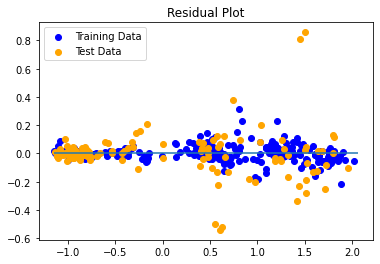

In [18]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train.ravel(), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test.ravel(), c="orange", label="Test Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")

In [19]:
y_scaler.inverse_transform(predictions)

array([10364.3491, 36799.744 ,  9367.0081, 11413.2663,  7683.4865,
       11194.4122, 11903.1594, 11742.5556, 61065.1325,  9733.6905,
       18600.121 , 51443.0377, 11462.0061,  9208.8776,  8079.1678,
       47131.3021, 33004.3932,  9568.2291, 10374.65  ,  9568.1943,
       49580.0838, 11453.9312,  9198.1551,  9304.7127, 56820.718 ,
       11089.7438, 37604.3728, 10560.0015, 11558.1092,  9501.0285,
       36494.311 , 37143.585 , 33145.7034,  6449.0534,  6781.5174,
        9330.2464, 43508.5987, 16299.8571, 11258.1222, 10635.471 ,
       19422.6452, 58293.1823, 44314.466 , 48538.7012,  9496.4518,
       34479.7708,  6162.851 ,  6193.1016, 38300.2132, 11195.0335,
        7871.0064, 39267.2375, 52896.3901, 33607.484 ,  9216.485 ,
       49699.722 ,  9343.6469, 44495.796 , 15078.4055,  8351.9657,
       40588.4959, 36139.3111, 48101.7933, 35430.6446,  8468.9595,
       47174.4019,  7133.4062, 53129.6319, 53183.5124,  8922.0035,
       36332.2738, 33639.4794, 10296.6317, 11727.5388, 53167.8